In [2]:
#pip install opencv-python

In [327]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/DebalB/Python_public/blob/master/extract_image_content/extract_image_content.py

In [328]:
#cv2.__version__

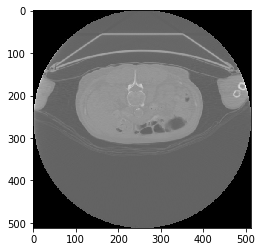

In [329]:
img = cv2.imread("1_YES_EXP00010_e1.nii_SL_131_PROB_0.12282294034957886.jpg")
clone = img.copy()
(H, W) = img.shape[:2]
img_centre_x = W//2
img_centre_y = H//2
plt.imshow(img)

In [330]:
img.shape

(512, 512, 3)

(512, 512)

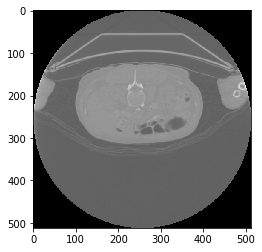

In [331]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

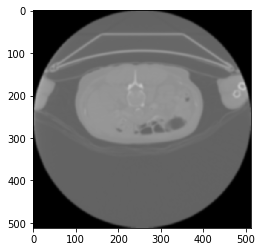

In [332]:
blurred = cv2.GaussianBlur(img, (11, 11), 0)
plt.imshow(blurred)

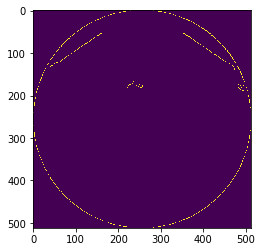

In [333]:
canny = cv2.Canny(blurred, 50, 100)
plt.imshow(canny)

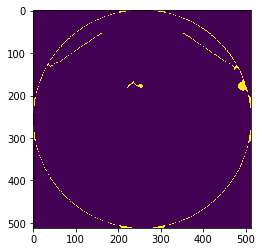

In [334]:
dilateSize = 3
#dilateSize = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilateSize,dilateSize))
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel)
canny_morphed = canny
canny_morphed  = cv2.dilate(canny_morphed,kernel,iterations=5)
#cv2.imshow("canny_morphed1", canny_morphed)
canny_morphed  = cv2.erode(canny_morphed,kernel,iterations=5)
plt.imshow(canny_morphed)

In [335]:
MIN_CONTOUR_AREA = 7000
RESIZE_IMAGE = False
DEBUG = False

In [336]:
import contour_lib
contours_list = contour_lib.get_contours(canny_morphed, min_contour_area=1500.0)


In [337]:
for c in contours_list:
    tmpAreaBlack = np.zeros(clone.shape)
    print("No of points in contour= {}, area: {}".format(len(c[0]), c[2]))
    cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)
    plt.imshow(tmpAreaBlack)
    plt.show()

In [338]:
tmpAreaBlack = np.zeros(clone.shape)
c=contours_list[1]
print("No of points in contour= {}, area: {}".format(len([0]), c[2]))
cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)

mask = tmpAreaBlack[:,:,0].astype("uint8")
new_img_blk_bg = cv2.bitwise_and(clone, clone, mask=mask)
plt.imshow(new_img_blk_bg)
plt.axis("off")
plt.savefig("output31.jpg")
plt.show()



IndexError: list index out of range

## De-Blurr Image

In [339]:
#pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


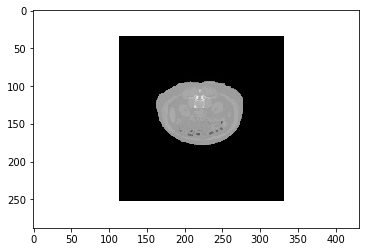

In [515]:

from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('C:/Users/rutuj/Downloads/imagesegmentation/Outputs/output30.jpg'))
plt.imshow(img)


(288, 432)


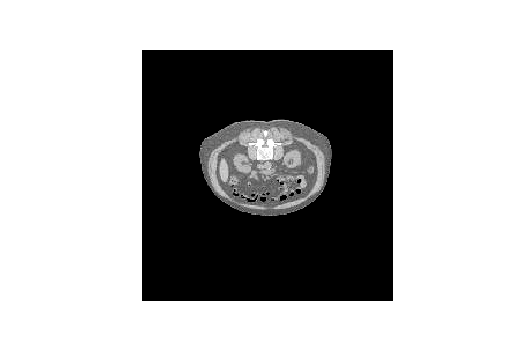

In [516]:
print(np.shape(img))
fig = plt.figure(dpi=110)
plt.imshow(img, vmin=0.55, vmax=0.70
           , cmap='gray')
plt.axis('off')
plt.savefig('filter1.jpg', transparent=True, bbox_inches='tight', pad_inches=0)

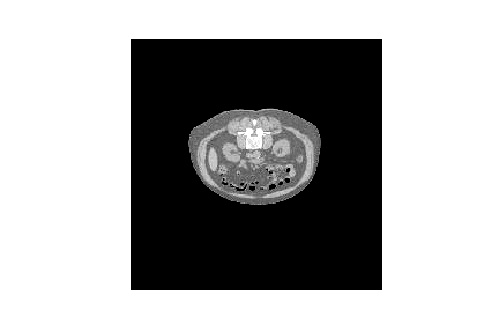

In [517]:
from PIL import ImageEnhance
from PIL import Image
xi = Image.open('filter1.jpg')

enhancer = ImageEnhance.Contrast(xi)

enhanced_im = enhancer.enhance(1
                              )
enhanced_im.save('deblur30.jpg')
enhanced_im

In [348]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration


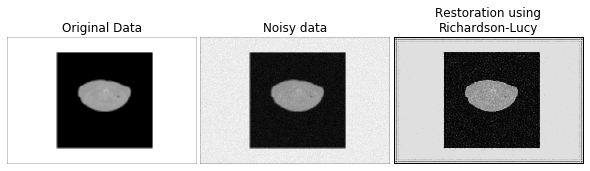

In [350]:

astro = color.rgb2gray(io.imread('C:/Users/rutuj/Downloads/imagesegmentation/Outputs/output1.jpg'))
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()